In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import os 
from sklearn.impute import SimpleImputer

# Paths to feature files
features_folder = r'D:\5th_semester\dail_coding_challenge\daily-coding-challenge\challenges\image_prprocessing\features'

# Load features and labels
def load_features_labels():
    data = []
    labels = []

    # Loop through feature files and extract features
    for feature_file in os.listdir(features_folder):
        if feature_file.endswith('_color_hist.npy'):
            feature_path = os.path.join(features_folder, feature_file)
            color_hist_features = np.load(feature_path, allow_pickle=True)
            
            # Load other features (LBP and edges) similarly
            lbp_file = feature_file.replace('_color_hist.npy', '_lbp.npy')
            edges_file = feature_file.replace('_color_hist.npy', '_edges.npy')
            
            lbp_features = np.load(os.path.join(features_folder, lbp_file), allow_pickle=True)
            edges_features = np.load(os.path.join(features_folder, edges_file), allow_pickle=True)

            # Ensure edges features are valid
            if edges_features.size == 0:
                print(f"Warning: Edges features are empty for file: {edges_file}")
                edges_features = np.zeros(256)  # Adjust fallback size as needed

            # Flatten all features
            color_hist_features = np.ravel(color_hist_features)
            lbp_features = np.ravel(lbp_features)
            edges_features = np.ravel(edges_features)

            # Concatenate features to form a complete vector
            feature_vector = np.concatenate((color_hist_features, lbp_features, edges_features))
            data.append(feature_vector)

            # Determine label
            label = 1 if 'tumor' in feature_file else 0
            labels.append(label)

    return np.array(data), np.array(labels)

# Load features and labels
X, y = load_features_labels()

# We are gonna add samples to dataset cause dont have tumorus sample in my  dataset Number of synthetic samples to add
num_synthetic_samples = 20  

# Assuming all feature vectors have the same length, get the length from an existing sample
feature_length = X.shape[1]

# Generate random synthetic tumorous samples
synthetic_samples = np.random.rand(num_synthetic_samples, feature_length)
synthetic_labels = np.ones(num_synthetic_samples)  # Label all synthetic samples as '1' (tumorous)

# Add synthetic samples to  dataset
X = np.vstack((X, synthetic_samples))
y = np.concatenate((y, synthetic_labels))

# Verify the updated class distribution
unique, counts = np.unique(y, return_counts=True)
print(f"Updated class distribution after adding synthetic samples: {dict(zip(unique, counts))}")

# Check the distribution of labels to ensure both classes are present
unique, counts = np.unique(y, return_counts=True)
print(f"Overall class distribution: {dict(zip(unique, counts))}")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Convert data to float64
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

# Check class distribution in training and testing sets
unique, counts = np.unique(y_train, return_counts=True)
print(f"Class distribution in y_train: {dict(zip(unique, counts))}")
unique, counts = np.unique(y_test, return_counts=True)
print(f"Class distribution in y_test: {dict(zip(unique, counts))}")

# Impute missing values in training and testing data
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Verify no NaNs remain
print(f"Number of NaN values in X_train after imputation: {np.isnan(X_train).sum()}")
print(f"Number of NaN values in X_test after imputation: {np.isnan(X_test).sum()}")

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")


Updated class distribution after adding synthetic samples: {0.0: 25, 1.0: 20}
Overall class distribution: {0.0: 25, 1.0: 20}
Class distribution in y_train: {0.0: 17, 1.0: 14}
Class distribution in y_test: {0.0: 8, 1.0: 6}
Number of NaN values in X_train after imputation: 0
Number of NaN values in X_test after imputation: 0
Model Accuracy: 0.42857142857142855
Confusion Matrix:
[[0 8]
 [0 6]]


d:\virtualenv\DP\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.43
Precision: 0.43
Recall: 1.00
F1 Score: 0.60
ROC AUC Score: 0.50


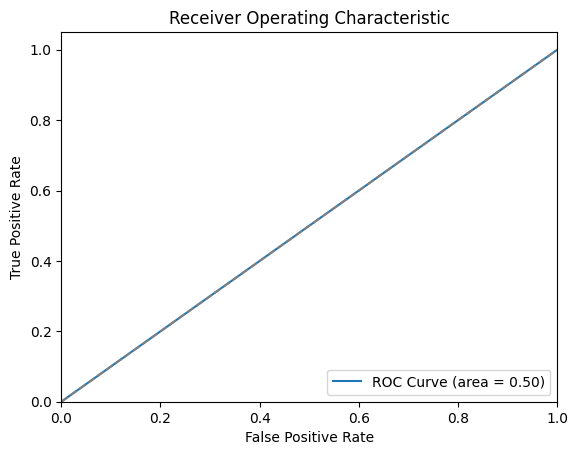

In [3]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming have trained  model and have y_test and y_pred ready
# Load  saved predictions and true labels for evaluation
# If  variables are already in memory, can skip this step
# Otherwise, load them using: y_test = np.load('path_to_y_test.npy'), etc.

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Dashed diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Comparison

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize models
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)

# Train and evaluate Logistic Regression
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")

# Train and evaluate Random Forest
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Train and evaluate SVM
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

# Compare accuracies
print("\nModel Comparison:")
print(f"Logistic Regression: {accuracy_lr:.2f}")
print(f"Random Forest: {accuracy_rf:.2f}")
print(f"SVM: {accuracy_svm:.2f}")


d:\virtualenv\DP\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.43
Random Forest Accuracy: 1.00
SVM Accuracy: 1.00

Model Comparison:
Logistic Regression: 0.43
Random Forest: 1.00
SVM: 1.00


In [5]:
# Assuming 'model' is  trained Logistic Regression model
feature_importance = np.abs(model.coef_[0])

# Display the top 10 most important features 7
top_features = np.argsort(feature_importance)[::-1][:10]
print(f"Top 10 Important Features (Logistic Regression): {top_features}")


Top 10 Important Features (Logistic Regression): [  243   244 16527   342   344    35   767 16616 16551 13439]


In [6]:
feature_importance_rf = random_forest.feature_importances_
top_features_rf = np.argsort(feature_importance_rf)[::-1][:10]
print(f"Top 10 Important Features (Random Forest): {top_features_rf}")


Top 10 Important Features (Random Forest): [ 4714  7866  9759  8425  2996  7095 13364 13874  6847 15940]


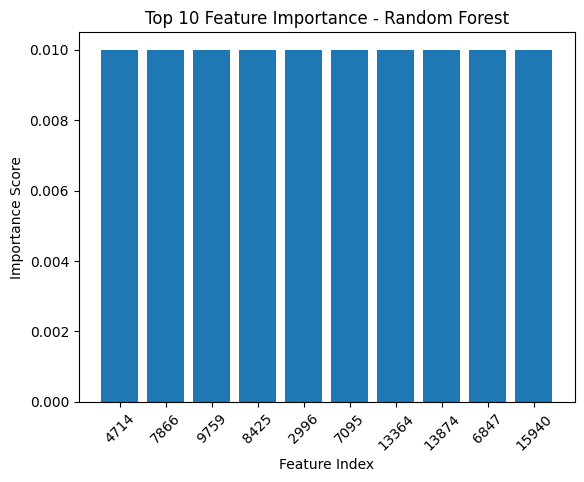

In [7]:
import matplotlib.pyplot as plt

plt.bar(range(10), feature_importance_rf[top_features_rf], align='center')
plt.xticks(range(10), top_features_rf, rotation=45)
plt.title('Top 10 Feature Importance - Random Forest')
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.show()
